In [2]:
import numpy as np
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
datafile = pd.read_csv('weatherAUS.csv')

In [5]:
datafile.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
for columns in datafile:
    if datafile[columns].dtype == 'object':
        uniq_val = datafile[columns].unique()
        print(columns, '--- ', uniq_val)

Date ---  ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Location ---  ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir ---  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
WindDir9am ---  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm ---  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE

In [8]:
# we observe here that raintoday and raintommorow are yes or no values
## so we can replace them with 1 and 0

In [9]:
datafile['RainToday'].replace(['Yes', 'No'], [1, 0], inplace=True)


In [10]:
datafile['RainToday'].unique()

array([ 0.,  1., nan])

In [11]:
datafile['RainTomorrow'].replace(['Yes', 'No'], [1, 0], inplace= True)

In [12]:
datafile['RainTomorrow'].unique()

array([0, 1], dtype=int64)

In [13]:
# lets see if the data is balanced

<AxesSubplot:>

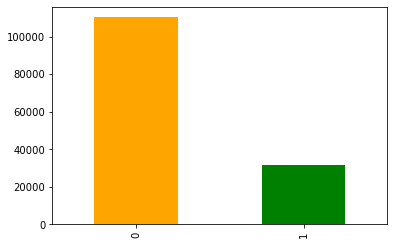

In [14]:
counts = datafile['RainTomorrow'].value_counts()

# Create bar plot
counts.plot(kind='bar', color=["orange", "green"])

In [15]:
# now we observe the data is not balanced so we need to do some data augmentation to bring the data to equal level

In [16]:
# we use resample operation to do it

In [17]:
from sklearn.utils import resample

In [18]:
minority = datafile[datafile["RainTomorrow"] == 1]
majority = datafile[datafile["RainTomorrow"] == 0]

In [19]:
resampled_minority = resample(minority, n_samples = len(majority), replace = True, random_state =42)

In [20]:
balanced_data = pd.concat([majority, resampled_minority])

In [21]:
# lets plot the balanced data

In [22]:
counts = balanced_data["RainTomorrow"].value_counts()

In [23]:
counts

0    110316
1    110316
Name: RainTomorrow, dtype: int64

<AxesSubplot:>

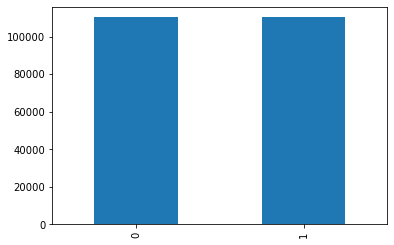

In [24]:
counts.plot(kind='bar')

In [25]:
# now we have successfully obtained the balanced set

### Now we have to see the null values, let's first heatmap them

In [26]:
null_values = balanced_data.isnull()

In [27]:
null_values.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

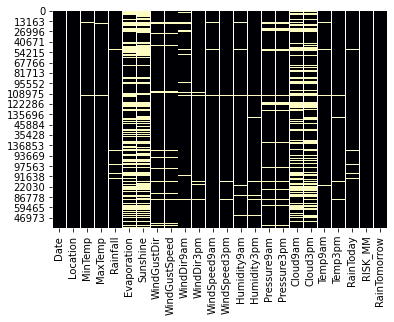

In [28]:
sns.heatmap(null_values, cmap='magma', cbar=False)

In [29]:
# missing values in each classes
perc_df = {'percErr': []}
for col in balanced_data: 
    perc_df['percErr'] = perc_df['percErr'] + [int(100*balanced_data[col].isnull().sum()/len(balanced_data[col]))]

In [30]:
perc_df = pd.DataFrame(perc_df)
perc_df.index = [col for col in balanced_data]


In [31]:
perc_df = perc_df.sort_values('percErr', ascending=False)

In [32]:
perc_df.head()

,percErr
Sunshine,47
Evaporation,43
Cloud3pm,38
Cloud9am,36
Pressure3pm,9


In [33]:
# now we have observed we have nearly 47% of missing data in sunshine and rest are given in the table

In [34]:
# we are going to replace the categorical missing data with their mode values

In [35]:
for col in balanced_data:
    if balanced_data[col].dtype == 'object':
        # calculate the mode val for category
        modval = balanced_data[col].mode()[0]
        # replace the null values with mod
        balanced_data[col].fillna(modval, inplace=True)

In [36]:
dic = {}
for col in balanced_data:
    if balanced_data[col].dtype == 'object':
        dic[col] =  balanced_data[col].isnull().sum()
print(dic)

{'Date': 0, 'Location': 0, 'WindGustDir': 0, 'WindDir9am': 0, 'WindDir3pm': 0}


In [37]:
# so we have made all the categorical values to its mode value

In [38]:
# lets analyse the heatmap of missing data now

In [39]:
nulldata = balanced_data.isnull()

<AxesSubplot:>

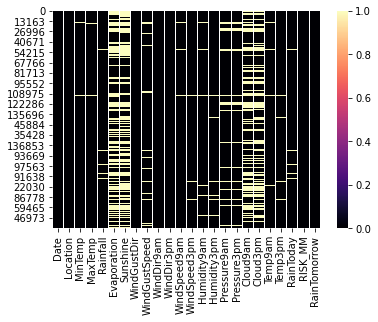

In [40]:
sns.heatmap(nulldata, cmap='magma')

In [41]:
# so here we have made every categorical data into a numerical data

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
labelencoder = {}
for col in balanced_data:
    if balanced_data[col].dtype == 'object':
        labelencoder[col] = LabelEncoder()
        balanced_data[col] = labelencoder[col].fit_transform(balanced_data[col])

In [44]:
x = [col for col in balanced_data if balanced_data[col].dtype =='object']
print('there are ', x, ' categorical data left')

there are  []  categorical data left


In [45]:
# now we have to place the missing values, for this we can use the iterative imputer

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# the importing require these two import statements since this is a experimental thing

In [47]:
# creating a object of iterative Imputer
data_imputer = IterativeImputer()

In [48]:
imputed_data = data_imputer.fit_transform(balanced_data)
imputed_data = pd.DataFrame(imputed_data, columns=balanced_data.columns)
imputed_data.head()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.729236,7.287791,13.0,44.0,13.0,...,22.0,1007.7,1007.1,8.000000,4.860405,16.9,21.8,0.0,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.642920,11.413475,14.0,44.0,6.0,...,25.0,1010.6,1007.8,1.754300,2.630434,17.2,24.3,0.0,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.741903,12.220816,15.0,46.0,13.0,...,30.0,1007.6,1008.7,1.831707,2.000000,21.0,23.2,0.0,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,5.962260,11.676829,4.0,24.0,9.0,...,16.0,1017.6,1012.8,1.233837,2.136636,18.1,26.5,0.0,1.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.835435,5.705397,13.0,41.0,1.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0.0


In [49]:
imputed_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [50]:
# so our data is free from missing values

In [51]:
# next job is to identify the outliers

In [52]:
q1 = imputed_data.quantile(0.25)
q3 = imputed_data.quantile(0.75)
iqr = q3-q1

iqr.head()

Date        1536.0
Location      25.0
MinTemp        9.2
MaxTemp       10.2
Rainfall       2.4
dtype: float64

In [53]:
lowerbound = q1-1.5*iqr
upperbound = q3+1.5*iqr
lowerbound.head()

Date       -1152.0
Location     -26.5
MinTemp       -5.8
MaxTemp        1.9
Rainfall      -3.6
dtype: float64

In [54]:
upperbound.head()

Date        4992.0
Location      73.5
MinTemp       31.0
MaxTemp       42.7
Rainfall       6.0
dtype: float64

In [55]:
outliers = (imputed_data < lowerbound) | (imputed_data > upperbound)

In [56]:
data_no_out= imputed_data[~outliers.any(axis=1)]

In [57]:
data_no_out.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.729236,7.287791,13.0,44.0,13.0,...,22.0,1007.7,1007.1,8.000000,4.860405,16.9,21.8,0.0,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.642920,11.413475,14.0,44.0,6.0,...,25.0,1010.6,1007.8,1.754300,2.630434,17.2,24.3,0.0,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.741903,12.220816,15.0,46.0,13.0,...,30.0,1007.6,1008.7,1.831707,2.000000,21.0,23.2,0.0,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,5.962260,11.676829,4.0,24.0,9.0,...,16.0,1017.6,1012.8,1.233837,2.136636,18.1,26.5,0.0,1.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.835435,5.705397,13.0,41.0,1.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0.0


In [58]:
# lets create a corellation heat map to see the corellated features
# we will keep only the non corelated values, ie we can remove one of the greatly corellated value

In [59]:
corr = data_no_out.corr()

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-61-e7578325662e>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

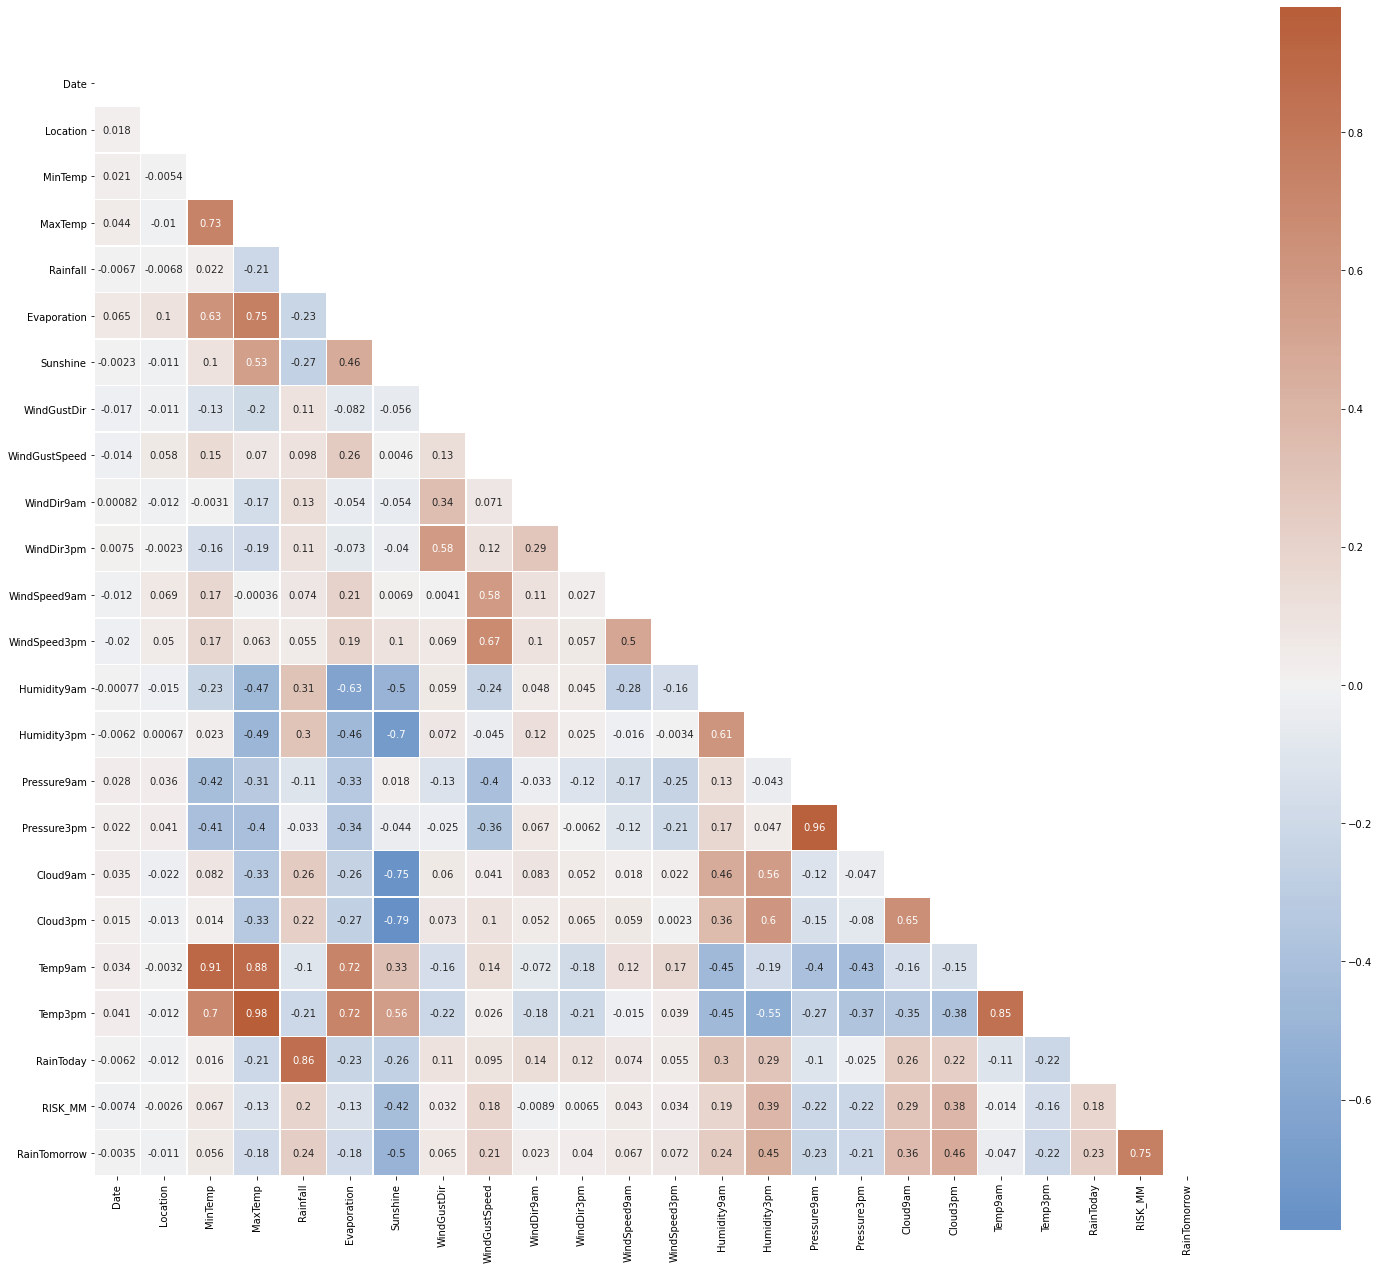

In [61]:
# we create a upper triangular matrix to hide the values, because they are symmetrical in heatmap
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
plt.subplots(figsize=(25, 25))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [62]:
# since there is no perfectly corellated pair we are not removing any, but we can consider removing the 0.98 or something

In [63]:
# However, we can delve deeper into the pairwise correlation between these highly correlated characteristics 
# by examining the following pair diagram

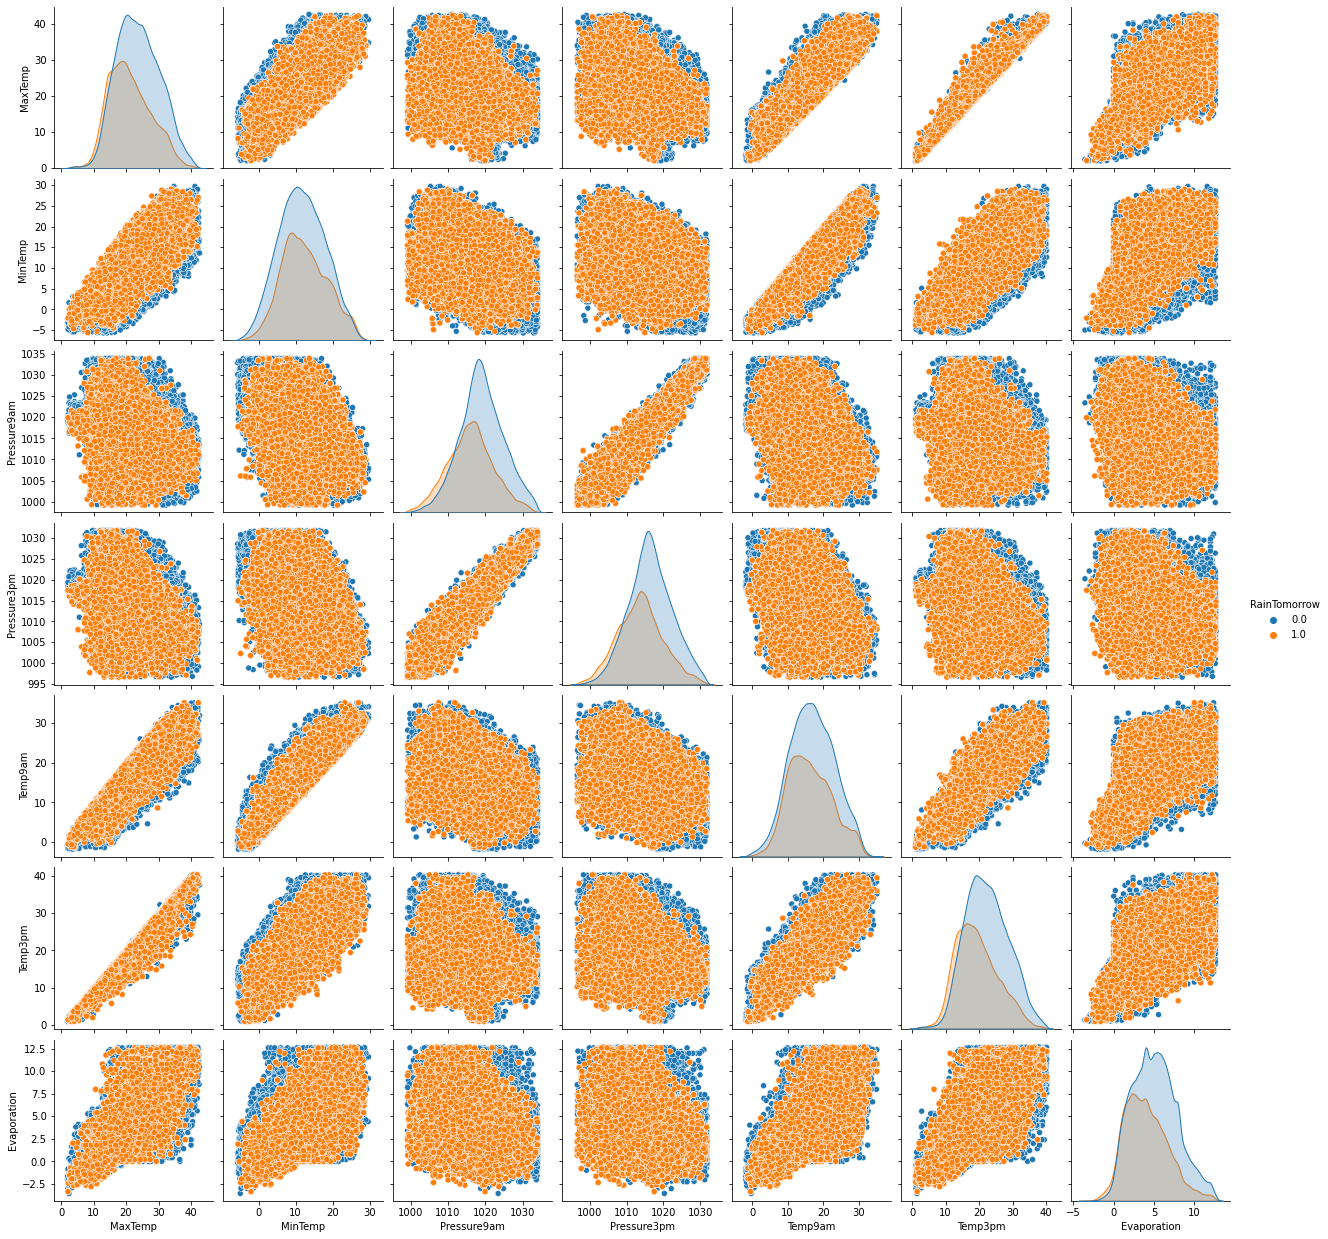

In [64]:
sns.pairplot(data=data_no_out,vars = ('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue="RainTomorrow")

In [65]:
data_no_out.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.729236,7.287791,13.0,44.0,13.0,...,22.0,1007.7,1007.1,8.000000,4.860405,16.9,21.8,0.0,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.642920,11.413475,14.0,44.0,6.0,...,25.0,1010.6,1007.8,1.754300,2.630434,17.2,24.3,0.0,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.741903,12.220816,15.0,46.0,13.0,...,30.0,1007.6,1008.7,1.831707,2.000000,21.0,23.2,0.0,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,5.962260,11.676829,4.0,24.0,9.0,...,16.0,1017.6,1012.8,1.233837,2.136636,18.1,26.5,0.0,1.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.835435,5.705397,13.0,41.0,1.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0.0
